# 🍷 Exploring the Wine Dataset and Trying Multiple ML Models for Prediction 🤖

In this notebook, we'll dive into understanding the world of wine through data. 🔍 For this, we're going to explore the Wine Dataset, a collection of data from chemical analyses of wines grown in Italy.

Here's a lowdown. Imagine wines as people, each with their unique characteristics. 🌟 This dataset helps us understand these unique traits by analysing 13 different aspects, such as alcohol content, acidity, and color intensity.

But why are we doing this? The goal is to see if we can use this data to distinguish between wines made from three different types of grapes, known as cultivars. 🍇 It's like a detective game, where we use clues (chemical properties) to identify the type of grape used in each wine. Exciting, right?

In our exploration, we'll delve into the data, examining it closely to uncover its nuances. After that, we'll explore various methods (or ML models), each offering a unique lens to predict the type of grape from the wine's chemical makeup. So, let's dive in!

### 🚀 Let's Get Started

We'll kick things off by setting up the necessary libraries 📚 we'll be using in our analysis! In this notebook, we will be using `antigranular` package to setup our project and talk to private dataset.

In [2]:
! pip install antigranular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.1 MB/s eta 0:00:00


Now, let's gear up with all the tools (libraries) we'll need for our wine data exploration 🛠️:

1. `pandas` 🐼: Our go-to buddy for juggling and reshaping data, which can transform our data into a format we can easily work with.
2. `matplotlib` 📊 and `seaborn` 🎨: These are our artists, helping us paint a vivid picture of our data. They'll help us visualise our findings in colorful graphs and charts, making the insights pop!
3. `antigranular` 🔗: This is our secret key to connect with the private dataset. It's our special pass that allows us to access and communicate with the hidden treasure of data.

In [3]:
# Lets's import all the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import antigranular as ag

In [4]:
# Let's create a new session
session = ag.login("<client-id>", "<client-secret>", dataset = "The Wine Dataset")

Loading dataset "The Wine Dataset" to the kernel...
Dataset "The Wine Dataset" loaded to the kernel as the_wine_dataset
Connected to Antigranular server session id: 3e06174b-9a44-457b-8f18-541b4015bed7, the session will time out if idle for 25 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


📝 From the logs, it's clear that we've successfully logged into antigranular. The dataset we need is already loaded and waiting for us under the variable `the_wine_dataset`.
Now, we can use the `%%ag` magic ✨ to execute code in the private kernel.

## 📊 Preparing Our Data for Analysis
In this section, we're laying the groundwork for our wine classification journey 🍇. Our goal is to teach our machine learning models to distinguish between different types of wines based on their chemical properties. To achieve this, we need to organise our data into training and testing sets:

1. **Training Data**: This is the bulk of our data, which we'll use to 'teach' our models. It includes both the features (like alcohol content, acidity, etc.) and the corresponding labels (the type of grape).
2. **Testing Data**: This set is our 'exam' for the models. It tests how well they have learned to predict grape types based on new, unseen data.

By carefully preparing our data, we set the stage for effective learning and accurate predictions. 🚀

In [5]:
%%ag
# Let's setup training and test private dataframe
train_x = the_wine_dataset['train_x']
train_y = the_wine_dataset['train_y']
test_x = the_wine_dataset['test_x']

#### Leveraging `ag_utils` and `ag_print` for Enhanced Dataset Analysis 🧰

Now, we can use [ag_print](https://docs.antigranular.com/private-python/quickstart-guides/ag-print#using-ag_print) built-in function in private kernel to print metadata for training sets.

We can also use [export](https://docs.antigranular.com/private-python/quickstart-guides/qs_antigranular#exporting-objects) function from `ag_urils` module to export the test_x variable.

In [6]:
%%ag
from ag_utils import export, ag_print

ag_print(train_x.metadata)
ag_print(train_y.metadata)
export(test_x, 'test_x')

Setting up exported variable in local environment: test_x
{'alcohol': (11.03, 14.83), 'malic_acid': (0.89, 5.8), 'ash': (1.3599999999999999, 3.23), 'alcalinity_of_ash': (10.6, 30.0), 'magnesium': (70, 162), 'total_phenols': (0.98, 3.88), 'flavanoids': (0.34, 5.08), 'nonflavanoid_phenols': (0.13, 0.66), 'proanthocyanins': (0.42, 3.58), 'color_intensity': (1.74, 13.0), 'hue': (0.48, 1.71), '0D280_0D315_of_diluted_wines': (1.27, 4.0), 'proline': (278, 1547)}
{'cultivars': (1, 3)}



In [7]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       36 non-null     float64
 1   malic_acid                    36 non-null     float64
 2   ash                           36 non-null     float64
 3   alcalinity_of_ash             36 non-null     float64
 4   magnesium                     36 non-null     int64  
 5   total_phenols                 36 non-null     float64
 6   flavanoids                    36 non-null     float64
 7   nonflavanoid_phenols          36 non-null     float64
 8   proanthocyanins               36 non-null     float64
 9   color_intensity               36 non-null     float64
 10  hue                           36 non-null     float64
 11  0D280_0D315_of_diluted_wines  36 non-null     float64
 12  proline                       36 non-null     int64  
dtypes: floa

#### Quick Data Check 🧐

* Complete Data in `test_x` : With 36 entries and 13 columns, we have a full set of data, no missing values here!

* Varied Wine Traits : Our wine features, like alcohol (11.03 to 14.83) and malic acid (0.89 to 5.8), show a great variety, perfect for diverse testing.

* Efficient Data Handling : A mix of data types and a light memory usage of 3.9 KB means our data is in good shape for analysis.

* Target: Cultivars : With cultivars ranging from 1 to 3, we're all set to classify wines into three groups.

Looks like our dataset is ready to go for the wine classification challenge! 🙌🏽

## 🎨 Data Visualisation

### 🕵️‍♂️ Navigating Private Data with Smart Tools

Dealing with private dataframes adds a twist to our wine exploration. We can't directly peek at the data, but no worries, we have a clever workaround! 💡

* **Crafty Visualisation with Histogram**: We'll use the `histogram` function for a sneak peek at each feature. It's like creating a secret sketch of our data without directly looking at it.
* **Export and Reveal**: Once we've got our histograms, we'll export them from the private kernel to our Jupyter kernel. This is the magic trick — transforming hidden data into visible insights!
* **Graph Galore**: With our data now in the open, we can unleash our creativity and visualise it in various graph forms. From bar charts to scatter plots, we'll paint a vivid picture of our wine data! 🎨

Let's decode the hidden stories in our wine dataset! 🚀

In [8]:
%%ag
# Creating histograms for each column in train_x and storing them in column_hist_data.

column_hist_data = {}
epsilon = 0.1 # setting epsilon to 0.1 as per privacy budget

for col in train_x.columns:
    column_hist_data[col] = train_x[col].hist(epsilon)

export(column_hist_data, 'column_hist_data')

Setting up exported variable in local environment: column_hist_data


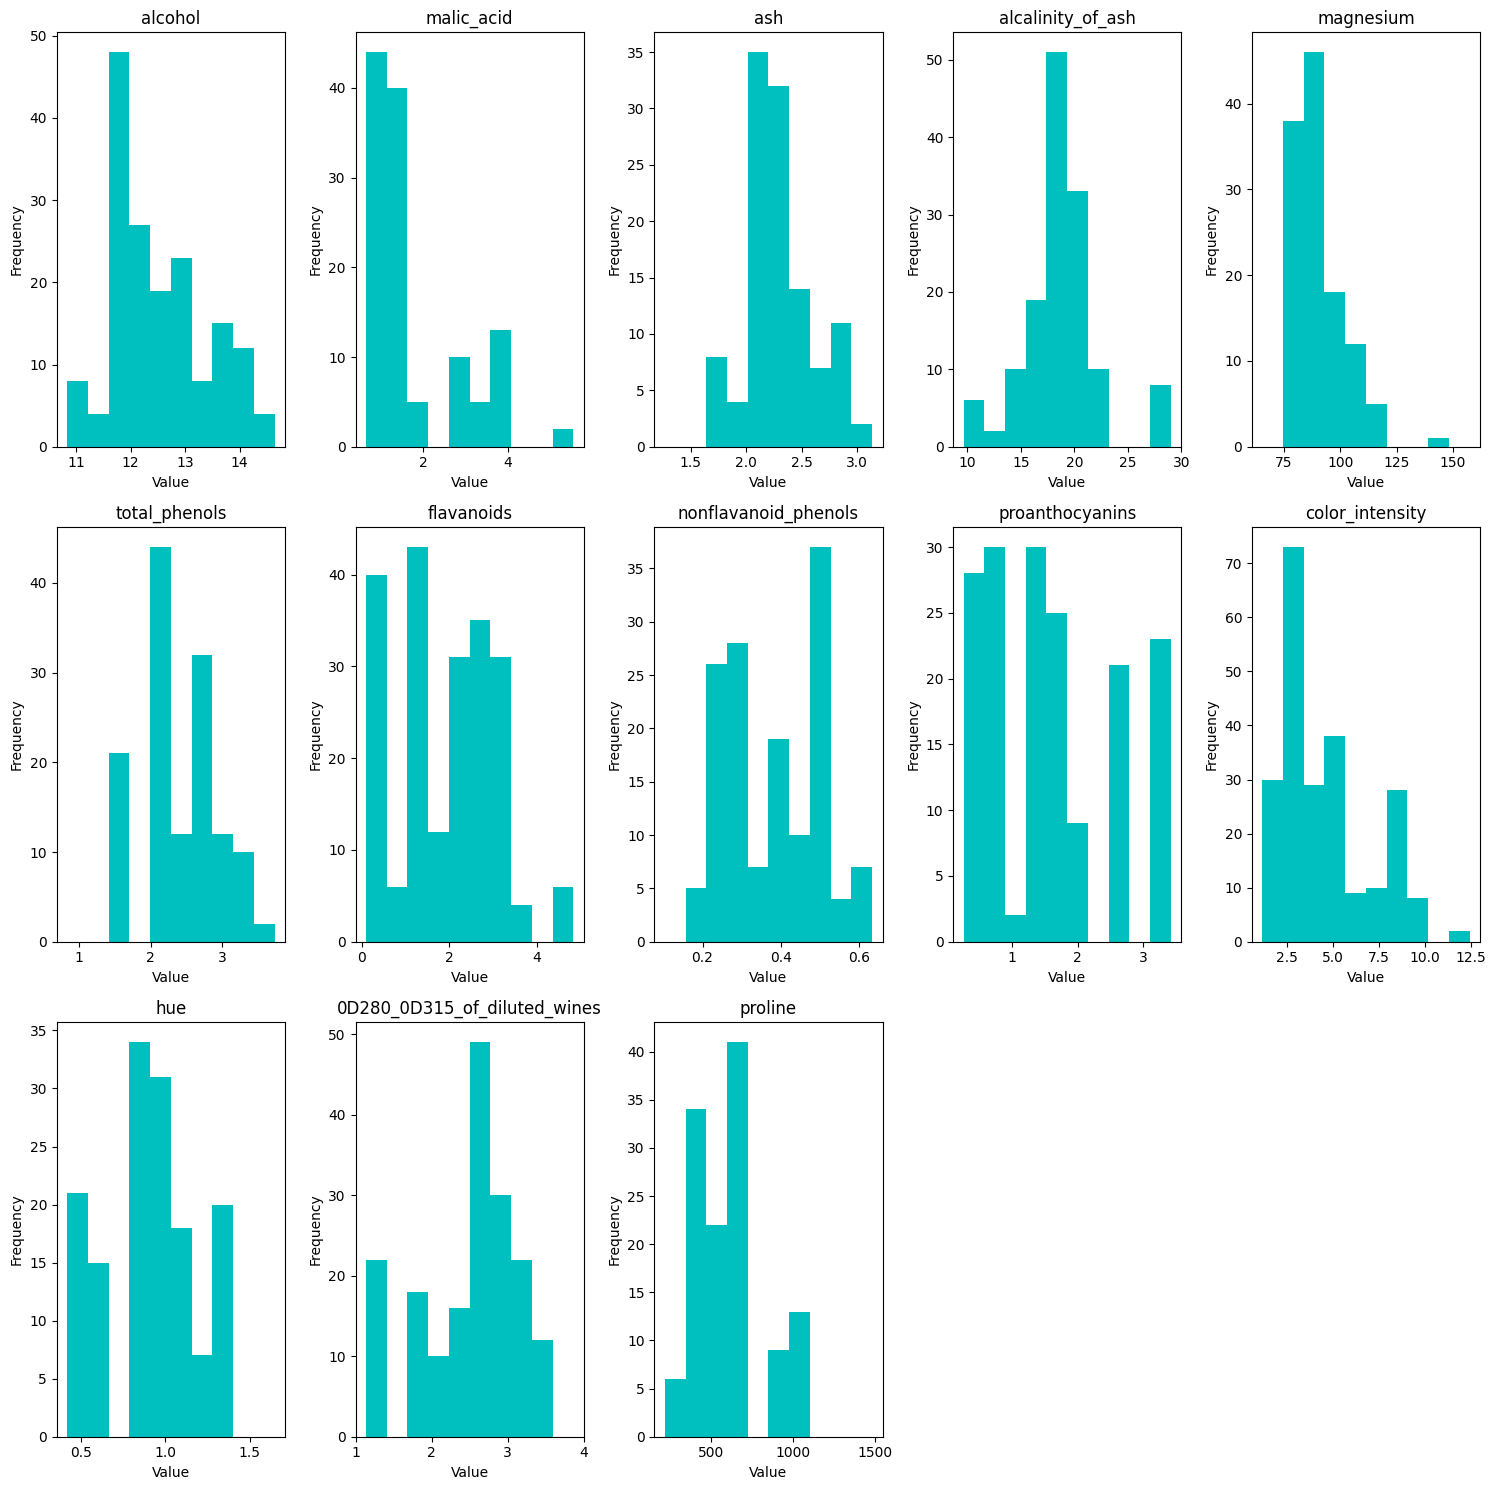

In [9]:
# histogram plots
num_cols = 5
num_rows = np.ceil(len(column_hist_data) / num_cols).astype(int)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))
axs = axs.ravel()  # flatten the array of axes

for i, col in enumerate(column_hist_data):
    values, bin_edges = column_hist_data[col]
    bin_width = bin_edges[1] - bin_edges[0]
    axs[i].bar(bin_edges[:-1], values, width=bin_width, color='c')
    axs[i].set_title(col)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Remove unused subplots
for i in range(len(column_hist_data), num_rows*num_cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

### 📚 Inference from Histogram Plots

Histograms are graphical representations that show the distribution of data. Here's what we found in our wine dataset: 🔍

✅ Normal Distribution: Many features in our dataset follow a normal distribution, resembling a bell curve. This means most wines have similar levels for these features, with fewer wines showing extreme values.

➡️ Right-Skewed Features: Features like malic_acid, flavonoids, and color_intensity are slightly right-skewed. This indicates a majority of wines have lower values for these attributes, but there's a small group with significantly higher values.

In essence, histograms help us understand the variation and central tendencies of our wine data, crucial for effective modeling and analysis.

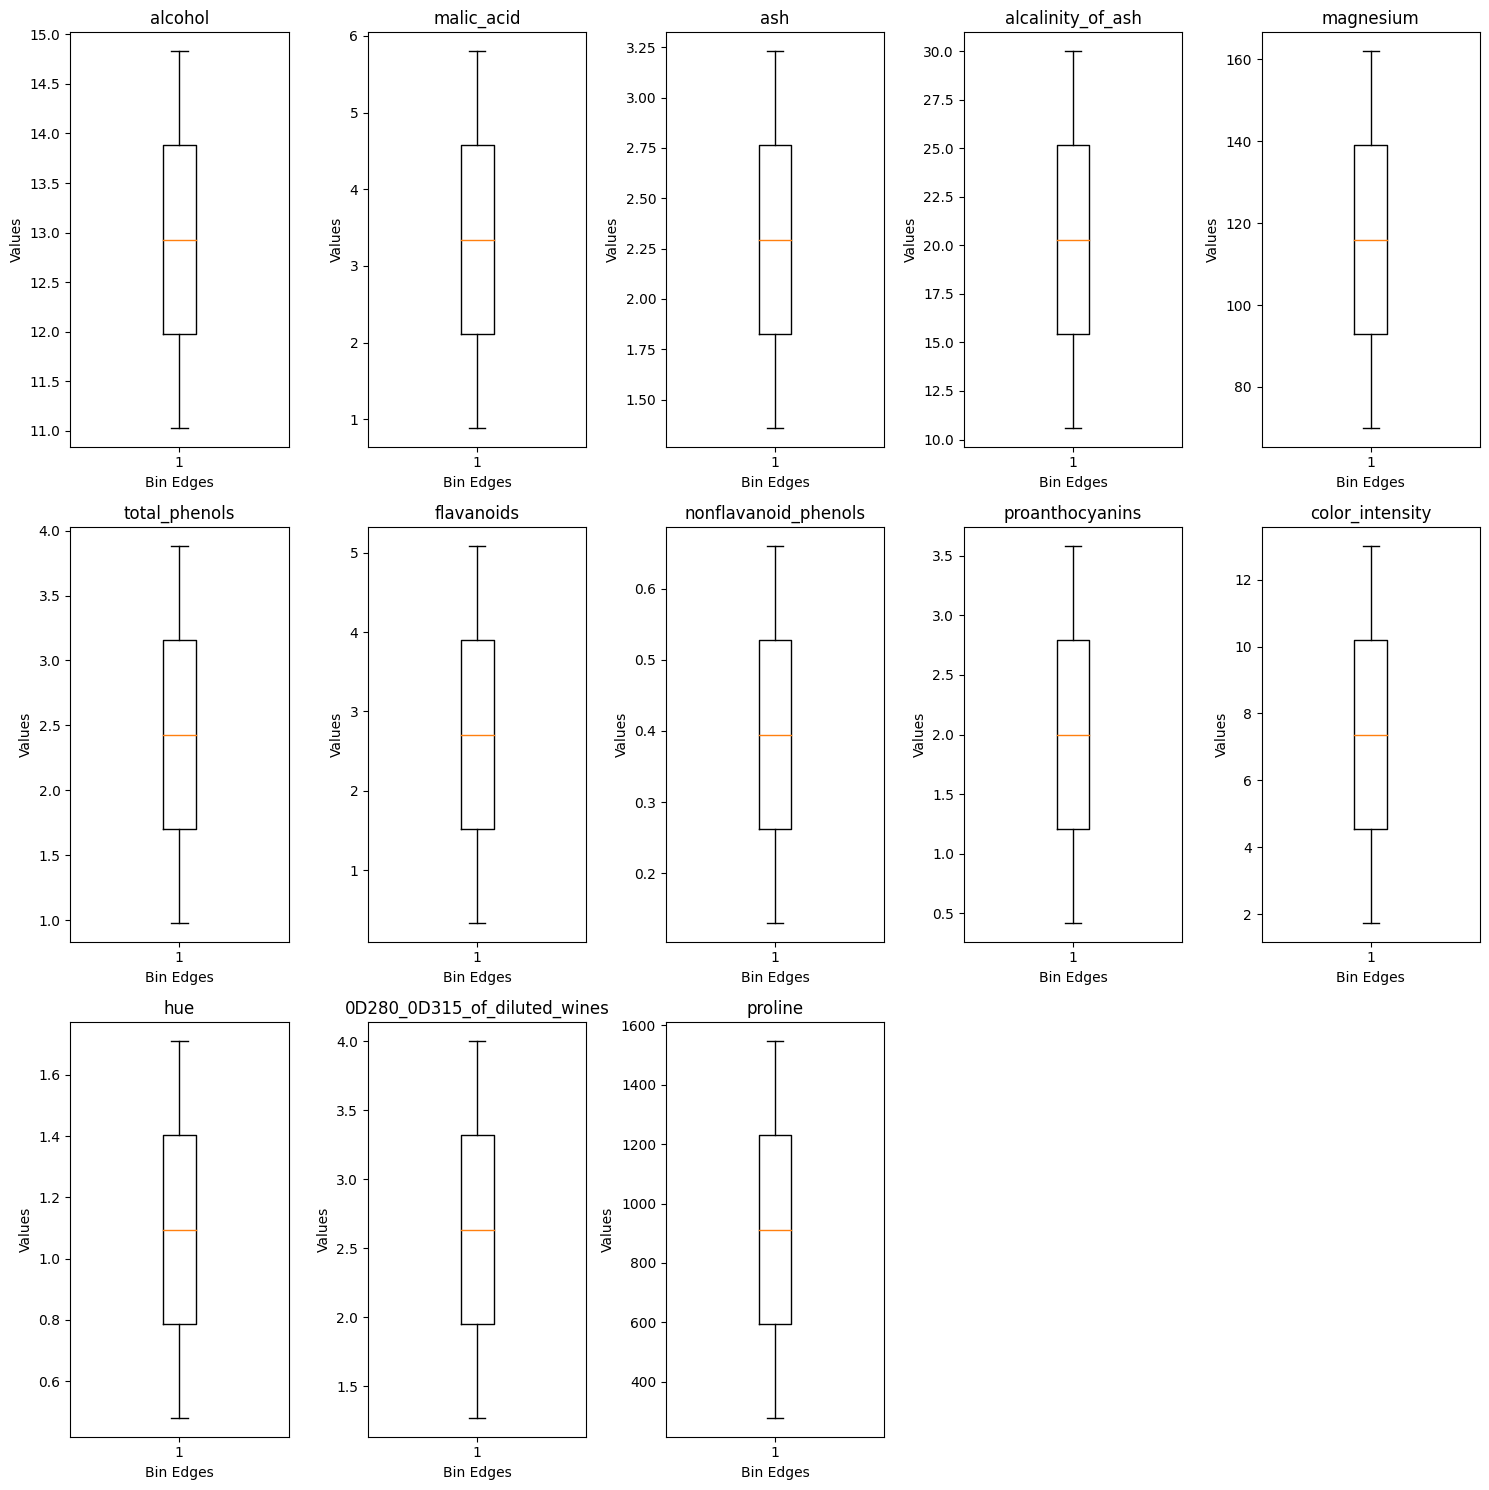

In [10]:
# box plot
num_cols = 5
num_rows = np.ceil(len(column_hist_data) / num_cols).astype(int)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))
axs = axs.ravel()  # flatten the array of axes

for i, col in enumerate(column_hist_data):
    values, bin_edges = column_hist_data[col]
    axs[i].boxplot(bin_edges)
    axs[i].set_title(col)
    axs[i].set_xlabel('Bin Edges')
    axs[i].set_ylabel('Values')

# Remove unused subplots
for i in range(len(column_hist_data), num_rows*num_cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

### 📉 Inference from Box Plots

Box plots are a great tool for visualising statistical distributions and identifying outliers. Here's what they reveal about our wine dataset:

🤓 Minimal Outliers: The box plots indicate that most features in our dataset have few outliers. This suggests that the data points for these features are largely consistent, with only a few exceptions deviating from the norm.
In short, the box plots show a generally uniform distribution for most wine characteristics, which is beneficial for analysis and modeling.

## 🤖 Applying ML Models for Prediction

We've reached an exciting phase in our journey — applying Machine Learning (ML) models to our training data. We'll harness models from the [op_diffprivlib](https://docs.antigranular.com/private-python/packages/diffprivlib) library, known for its robust and privacy-centric algorithms.

Our toolkit includes a variety of models, each offering a unique approach to understanding our wine data:

* **Linear Regression**: This model will help us identify linear relationships between features and the target.
* **Logistic Regression**: Ideal for classification, it will aid in predicting the category of each wine.
* **Random Forest Classifier**: A powerful ensemble model that uses multiple decision trees to make more accurate predictions.
* **Decision Tree Classifier**: This model will help us visualise the decision-making process, breaking down how each feature contributes to the final prediction.
* **K-Means Classifier**: Great for uncovering hidden patterns, this model will cluster similar data points together.

Let's dive in and see how these models perform in predicting our wine characteristics! 💻

In [ ]:
%%ag
# setting the bounds for train_x
l_meta, r_meta = [], []
for l,r in train_x.metadata.values():
  l_meta.append(l)
  r_meta.append(r)
bounds_x = ( l_meta , r_meta ) # ([lower] , [upper])

# setting the bounds for train_y
l_meta, r_meta = [], []
for l,r in train_y.metadata.values():
  l_meta.append(l)
  r_meta.append(r)
bounds_y = ( l_meta , r_meta ) # ([lower] , [upper])

ag_print(bounds_x)
ag_print(bounds_y)

([11.03, 0.89, 1.3599999999999999, 10.6, 70, 0.98, 0.34, 0.13, 0.42, 1.74, 0.48, 1.27, 278], [14.83, 5.8, 3.23, 30.0, 162, 3.88, 5.08, 0.66, 3.58, 13.0, 1.71, 4.0, 1547])
([1], [3])



In [ ]:
%%ag
from op_diffprivlib import models
from ag_utils import submit_predictions
import pandas as pd

# linear regression
linear_regression = models.LinearRegression(bounds_X=bounds_x, bounds_y=bounds_y, epsilon=20)
linear_regression.fit(train_x, train_y)

linear_regression_prediction = linear_regression.predict(test_x)
submit_predictions(pd.DataFrame(linear_regression_prediction))

score: {'leaderboard': 0.11156246702681294, 'logs': {'BIN_ACC': 0.11156246702681294}}



In [ ]:
%%ag
# logistic regression
train_x_2 = train_x ** 2
l_2_norm = train_x_2.sum(axis = 1) ** 0.5
l_2_norm = l_2_norm.quantile(1, eps=10)

logistic_regression = models.LogisticRegression(data_norm=l_2_norm, epsilon=20)
logistic_regression.fit(train_x, train_y)

logistic_regression_prediction = logistic_regression.predict(test_x)
submit_predictions(pd.DataFrame(logistic_regression_prediction))

score: {'leaderboard': 0.5634735326937808, 'logs': {'BIN_ACC': 0.5634735326937808}}



/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



In [ ]:
%%ag
# random forest classifier
random_forest_classifier = models.RandomForestClassifier(n_estimators=100, epsilon = 20 , random_state=33 , bounds=bounds_x, classes=[1,2,3])
random_forest_classifier.fit(train_x, train_y)

random_forest_classifier_prediction = random_forest_classifier.predict(test_x)
submit_predictions(pd.DataFrame(random_forest_classifier_prediction))

score: {'leaderboard': 0.3505404078995039, 'logs': {'BIN_ACC': 0.3505404078995039}}



/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



In [ ]:
%%ag
# decision tree classifier

decision_tree_classifier = models.DecisionTreeClassifier(epsilon=20, bounds=bounds_x, classes=[1,2,3])
decision_tree_classifier.fit(train_x, train_y)

decision_tree_classifier_prediction = decision_tree_classifier.predict(test_x)
submit_predictions(pd.DataFrame(decision_tree_classifier_prediction))

score: {'leaderboard': 0.518375470319612, 'logs': {'BIN_ACC': 0.518375470319612}}



/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



In [ ]:
%%ag
# k-means classifier

k_means_clustering = models.KMeans(n_clusters=3, epsilon=10, bounds=bounds_x)
k_means_clustering.fit(train_x, train_y)

k_means_clustering_prediction = k_means_clustering.predict(test_x)
submit_predictions(pd.DataFrame(k_means_clustering_prediction))

score: {'leaderboard': 0.5670978387846828, 'logs': {'BIN_ACC': 0.5670978387846828}}



### 📚 Inference from ML Models

| Model Name                 | Accuracy |
|----------------------------|----------|
| Linear Regression          |   11%    |
| Logistic Regression        |   56%    |
| Random Forest Classifier   |   35%    |
| Decision Tree Classifier   |   51%    |
| K-Means Clustering         |   56%    |

1. **Linear Regression**: The accuracy is quite low at 11%. This suggests that the relationship between the features and the target variable may not be linear, or there may be significant noise in the data.

2. **Logistic Regression and K-Means Clustering**: These models have the highest accuracy at 56%. This suggests that they are better suited to this particular dataset than the other models.

3. **Random Forest Classifier**: The accuracy is 35%, which is lower than Logistic Regression and K-Means Clustering but higher than Linear Regression. Random Forests are typically quite robust, so it's possible that the model could be improved with more tuning.

4. **Decision Tree Classifier**: The accuracy is 51%, which is quite close to that of Logistic Regression and K-Means Clustering. This suggests that the data may have a hierarchical structure that the Decision Tree is able to capture.


# 🔑 Conclusion
That's a wrap! We've gone through the Wine Dataset, used some cool tools (or models), and tried to unravel the mystery of identifying grape types from wine's chemical properties. Here's what we found:

1. **Best Detectives in Town** 🌟: Logistic Regression and K-Means Clustering models were our star performers, with an accuracy of 56%. This means they were able to correctly identify the grape type more than half the time based on the wine's chemistry.

2. **Not All Methods Are Equal** 📉: Interestingly, Linear Regression didn't do as well, with an accuracy of only 11%. This suggests that predicting grape types isn't just a straight-line relationship with the chemical properties.

3. **A Mixed Bag of Results** 🎭: Our other methods, like the Random Forest and Decision Tree, fell somewhere in the middle in terms of accuracy. This shows us that different tools have their own strengths and weaknesses in our detective work.

In the end, what we've learned is that while we can make some good guesses about grape types from wine's chemical properties, it's not always straightforward.

There's a lot of variety in wine, just like in life, and that's what makes it interesting! Thanks for joining me on this data exploration journey. 🥂